#### Statistical Modeling

In [25]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv(r'creditcard_cleaned.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_scaled,Time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,2.703663,-1.996260
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.765542,-1.996260
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,2.086937,-1.996239
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.823497,-1.996218
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0,-0.742403,-1.996218


In [27]:
#Features
X = df[['V10','V14','V17','Amount']]
y = df['Class']

In [28]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y,test_size=0.3, random_state=42)

In [29]:
#Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
#Add intercept
X_train_scaled = sm.add_constant(X_train_scaled)

In [31]:
#Model = Logistic Regression
model = sm.Logit(y_train, X_train_scaled).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.004297
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:               176428
Model:                          Logit   Df Residuals:                   176423
Method:                           MLE   Df Model:                            4
Date:                Mon, 04 Aug 2025   Pseudo R-squ.:                  0.6247
Time:                        16:36:02   Log-Likelihood:                -758.12
converged:                       True   LL-Null:                       -2020.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1498      0.132    -61.836      0.000      -8.408      -7.891
x1            -0.3080      0

### Task 4 - Machine learning Modeling

Predict whether a transaction is fraudulent ( class = 1) or not (class = 0)

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(class_weight='balanced',max_iter=1000, solver = 'liblinear',random_state=42)
model1.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('ROC-AUC Score:\n',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

In [40]:
evaluate_model(model1,X_test,y_test)

Confusion Matrix:
 [[49212  1120]
 [    4    73]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     50332
           1       0.06      0.95      0.11        77

    accuracy                           0.98     50409
   macro avg       0.53      0.96      0.55     50409
weighted avg       1.00      0.98      0.99     50409

ROC-AUC Score:
 0.9799430482892297


Confusion Matrix
- ✅ True Positives (TP): 73 frauds correctly detected
- ❌ False Positives (FP): 1,120 normal transactions flagged as fraud
- ❌ False Negatives (FN): Only 4 frauds missed — impressive!
- ✅ True Negatives (TN): 49,212 normal transactions correctly classified

Classification Report
✅ Class 0 (Not Fraud)
- Precision 1.00: Almost all predicted non-frauds are truly non-fraud.
- Recall 0.98: Slight drop — 2% of non-frauds are misclassified as fraud.
- F1-score 0.99: Excellent balance of precision and recall.
⚠️ Class 1 (Fraud)
- Precision 0.06: Very low — most flagged frauds are actually normal transactions.
- Recall 0.95: Very high — model catches almost all actual frauds.
- F1-score 0.11: Low due to poor precision.

#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(
    n_estimators=100,           # Number of trees in the forest
    class_weight='balanced',    # Class weight balancing
    max_depth=None,             # Maximum depth of the tree
    random_state=42,            # Reproducibility
    n_jobs=-1                   # Use all available cores
)

In [42]:
model2.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('ROC-AUC Score:\n',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))

evaluate_model(model2,X_test,y_test)

Confusion Matrix:
 [[50327     5]
 [   12    65]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     50332
           1       0.93      0.84      0.88        77

    accuracy                           1.00     50409
   macro avg       0.96      0.92      0.94     50409
weighted avg       1.00      1.00      1.00     50409

ROC-AUC Score:
 0.9668867550632629


Confusion Matrix
- ✅ True Positives (TP): 65 frauds correctly detected
- ✅ True Negatives (TN): 50,327 normal transactions correctly classified
- ❌ False Positives (FP): Only 5 normal transactions flagged as fraud
- ❌ False Negatives (FN): 12 frauds missed

Classification report
Class 0 (Not Fraud)
- Precision 1.00: Every predicted non-fraud is truly non-fraud.
- Recall 1.00: No normal transactions were misclassified.
- F1-score 1.00: Perfect balance — flawless performance.
Class 1 (Fraud)
- Precision 0.93: Very few false positives — excellent!
- Recall 0.84: Caught 84% of actual frauds — strong sensitivity.
- F1-score 0.88: High overall effectiveness in fraud detection

Accuracy
- Model is highly precise and very sensitive to fraud.
- It’s catching 84% of frauds while keeping false alarms extremely low.
- The ROC-AUC of 0.97 confirms that your model is excellent at distinguishing fraud from non-fraud.

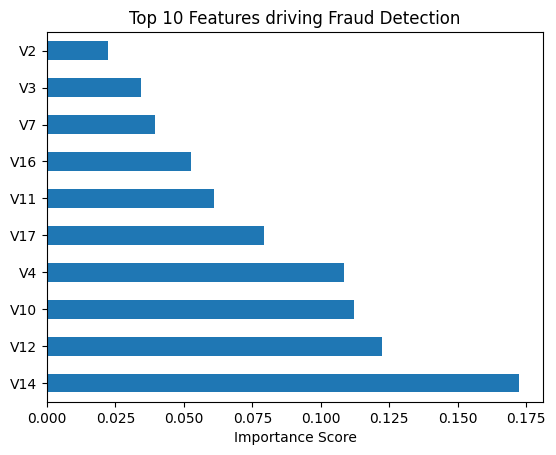

In [44]:
import matplotlib.pyplot as plt

feature_imp = pd.Series(model2.feature_importances_,index=X_train.columns)
feature_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features driving Fraud Detection')
plt.xlabel('Importance Score')
plt.show()

I used Random Forest to extract feature importances and found that V14, V12, and V10 were the most predictive. This helped me understand which dimensions of the transaction data were most critical for fraud detection.